# 0.0 - Import Libraries 

In [1]:
#manipulação dos dados 
import pandas as pd 
import numpy as np

#Algoritmos 
from sklearn import ensemble as en
from sklearn import metrics as mt 
from sklearn import tree as tr 
from sklearn import linear_model as lm
from sklearn import preprocessing as pp

#plots 
import plotly.express as px
import seaborn as sns 
from matplotlib import pyplot as plt 

# Notebook Configuration
plt.style.use( 'ggplot' )
plt.rcParams['figure.figsize'] = [18, 10]
plt.rcParams['font.size'] = 16

# 1.0 Import Datasets 

In [2]:
# X variables 

X_train_raw = pd.read_csv('X_training.csv', low_memory=False)
X_vali_raw = pd.read_csv('X_validation.csv', low_memory=False)
X_test_raw = pd.read_csv('X_test.csv', low_memory=False)

# Y variables 

y_train = np.ravel(pd.read_csv('y_training.csv', low_memory=False))
y_vali = np.ravel(pd.read_csv('y_val.csv', low_memory=False))
y_test = np.ravel(pd.read_csv('y_test.csv', low_memory=False))

# 2.0 Data Preparation

**Algorithms:** Decision Tree Regressor, Random Forest Regressor, Polinomial Regression, Linear Regression Lasso, Linear Regression Ridge, Linear Regression Elastic Net, Polinomial Regression Lasso, Polinomial Regression Ridge e Polinomial Regression Elastic Net. 

**Performance metrics:** R2, MSE, RMSE, MAE e MAPE

In [3]:
print(X_train_raw.shape , y_train.shape)

(10547, 13) (10547,)


In [4]:
print(X_vali_raw.shape, y_vali.shape)

(4521, 13) (4521,)


In [5]:
print(X_test_raw.shape, y_test.shape)

(3767, 13) (3767,)


<Axes: >

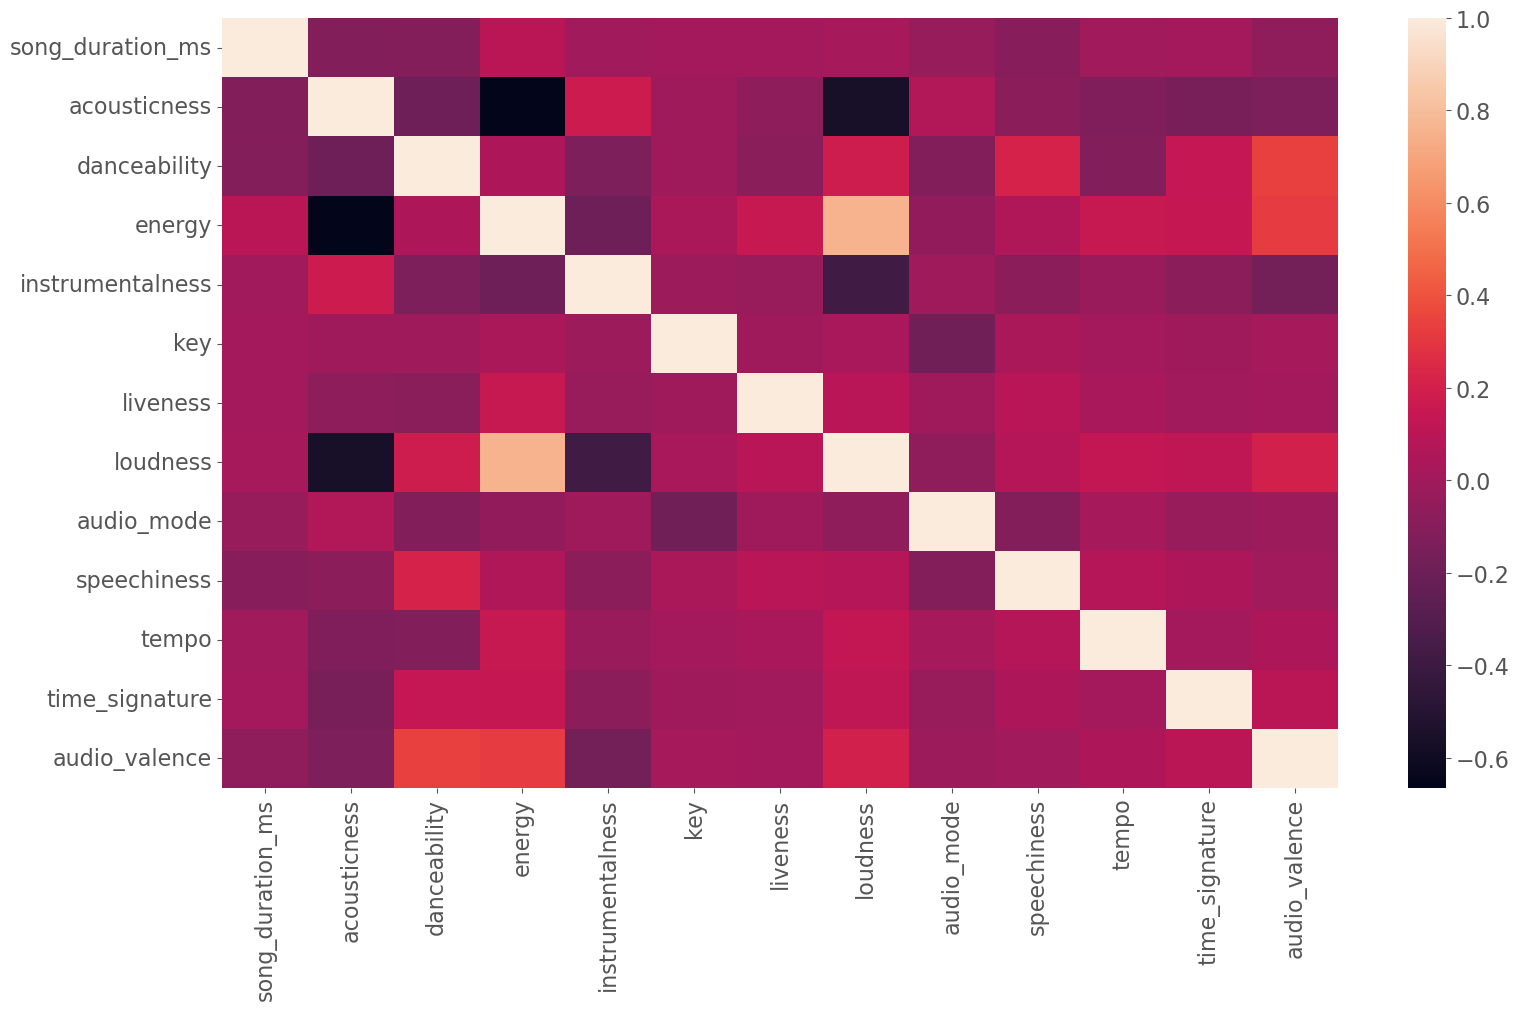

In [6]:
sns.heatmap(X_train_raw.corr(method='pearson'))

# 3.0 Regression Model Implementations

## 3.1 Features Selection 

In [7]:
all_features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

selected_features = ['song_duration_ms', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

In [8]:
X_train = X_train_raw[selected_features]
X_vali = X_vali_raw[selected_features]
X_test = X_test_raw[selected_features]

## 3.2 - Linear Regression

### 3.2.1 - Traininig Dataset

In [9]:
# Model Definition 
liner_reg = lm.LinearRegression()

# Model Training 
liner_reg.fit(X_train, y_train)

# Performance 
ypred_train = liner_reg.predict(X_train)

# Metrics 
linear_train_R2 = mt.r2_score(y_train, ypred_train)
linear_train_MSE = mt.mean_squared_error(y_train, ypred_train)
linear_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
linear_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
linear_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.2.2 - Validation Dataset 

In [10]:
# Performance 
ypred_vali = liner_reg.predict(X_vali)

# Metrics 
linear_vali_R2 = mt.r2_score(y_vali, ypred_vali)
linear_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
linear_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
linear_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
linear_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.2.3 - Test Dataset

In [11]:
# Performance 
ypred_test = liner_reg.predict(X_test)

# Metrics 
linear_test_R2 = mt.r2_score(y_test, ypred_test)
linear_test_MSE = mt.mean_squared_error(y_test, ypred_test)
linear_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
linear_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
linear_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.3.4 - Appending Results 

In [12]:
linear_train_results = [round(linear_train_R2,3), round(linear_train_MSE,3), 
                     round(linear_train_RMSE,3), round(linear_train_MAE,3), round(linear_train_MAPE,3) ]

linear_validation_results = [round(linear_vali_R2,3), round(linear_vali_MSE,3), 
                     round(linear_vali_RMSE,3), round(linear_vali_MAE,3), round(linear_vali_MAPE,3) ]

linear_test_results = [round(linear_test_R2,3), round(linear_test_MSE,3), 
                     round(linear_test_RMSE,3), round(linear_test_MAE,3), round(linear_test_MAPE,3) ]

linear_results_metrics = pd.DataFrame({'Train': linear_train_results, 'Validation': linear_validation_results, 'Test': linear_test_results})
linear_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Linear Regression : ')
print(linear_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Linear Regression : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.045 |        0.04  |   0.048 |
| MSE  | 456.561 |      458.197 | 463.691 |
| RMSE |  21.367 |       21.406 |  21.533 |
| MAE  |  17.015 |       17.041 |  17.178 |
| MAPE |   8.628 |        8.663 |   8.528 |


## 3.3 - Decision Tree Regression 

### 3.3.1 Finding the best max_depth for tree

In [13]:
m_depth_values = range(5, 50, 2)
results_train_dt_reg = pd.DataFrame()

for i in m_depth_values:
    # Model definition 
    dt_reg = tr.DecisionTreeRegressor(max_depth=i)
    
    # Model Training 
    dt_reg.fit(X_train, y_train)
    
    # Performance 
    ypred_train = dt_reg.predict(X_train)
    
    # Metrics 
    treereg_train_R2 = mt.r2_score(y_train, ypred_train)
    treereg_train_MSE = mt.mean_squared_error(y_train, ypred_train)
    treereg_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
    treereg_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
    treereg_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)
    
    # Results
    results_train = pd.Series([i, treereg_train_R2, treereg_train_MSE, treereg_train_RMSE, treereg_train_MAE, treereg_train_MAPE])
    
    # DataFraming arrays
    results_train_dt_reg = pd.concat([results_train_dt_reg, results_train], axis=1)

results_train_dt_reg.index = ['max_depth', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']
results_train_dt_reg.columns = m_depth_values
results_train_dt_reg = results_train_dt_reg.T
results_train_dt_reg.reset_index(drop=True, inplace=True)
results_train_dt_reg = results_train_dt_reg.round(3)

In [14]:
results_train_dt_reg.head()

,max_depth,R2,MSE,RMSE,MAE,MAPE
0,5.0,0.112,424.400,20.601,16.394,7.919
1,7.0,0.181,391.455,19.785,15.653,6.977
2,9.0,0.293,337.764,18.378,14.177,5.894
3,11.0,0.430,272.284,16.501,12.146,4.585
4,13.0,0.577,202.315,14.224,9.642,3.267


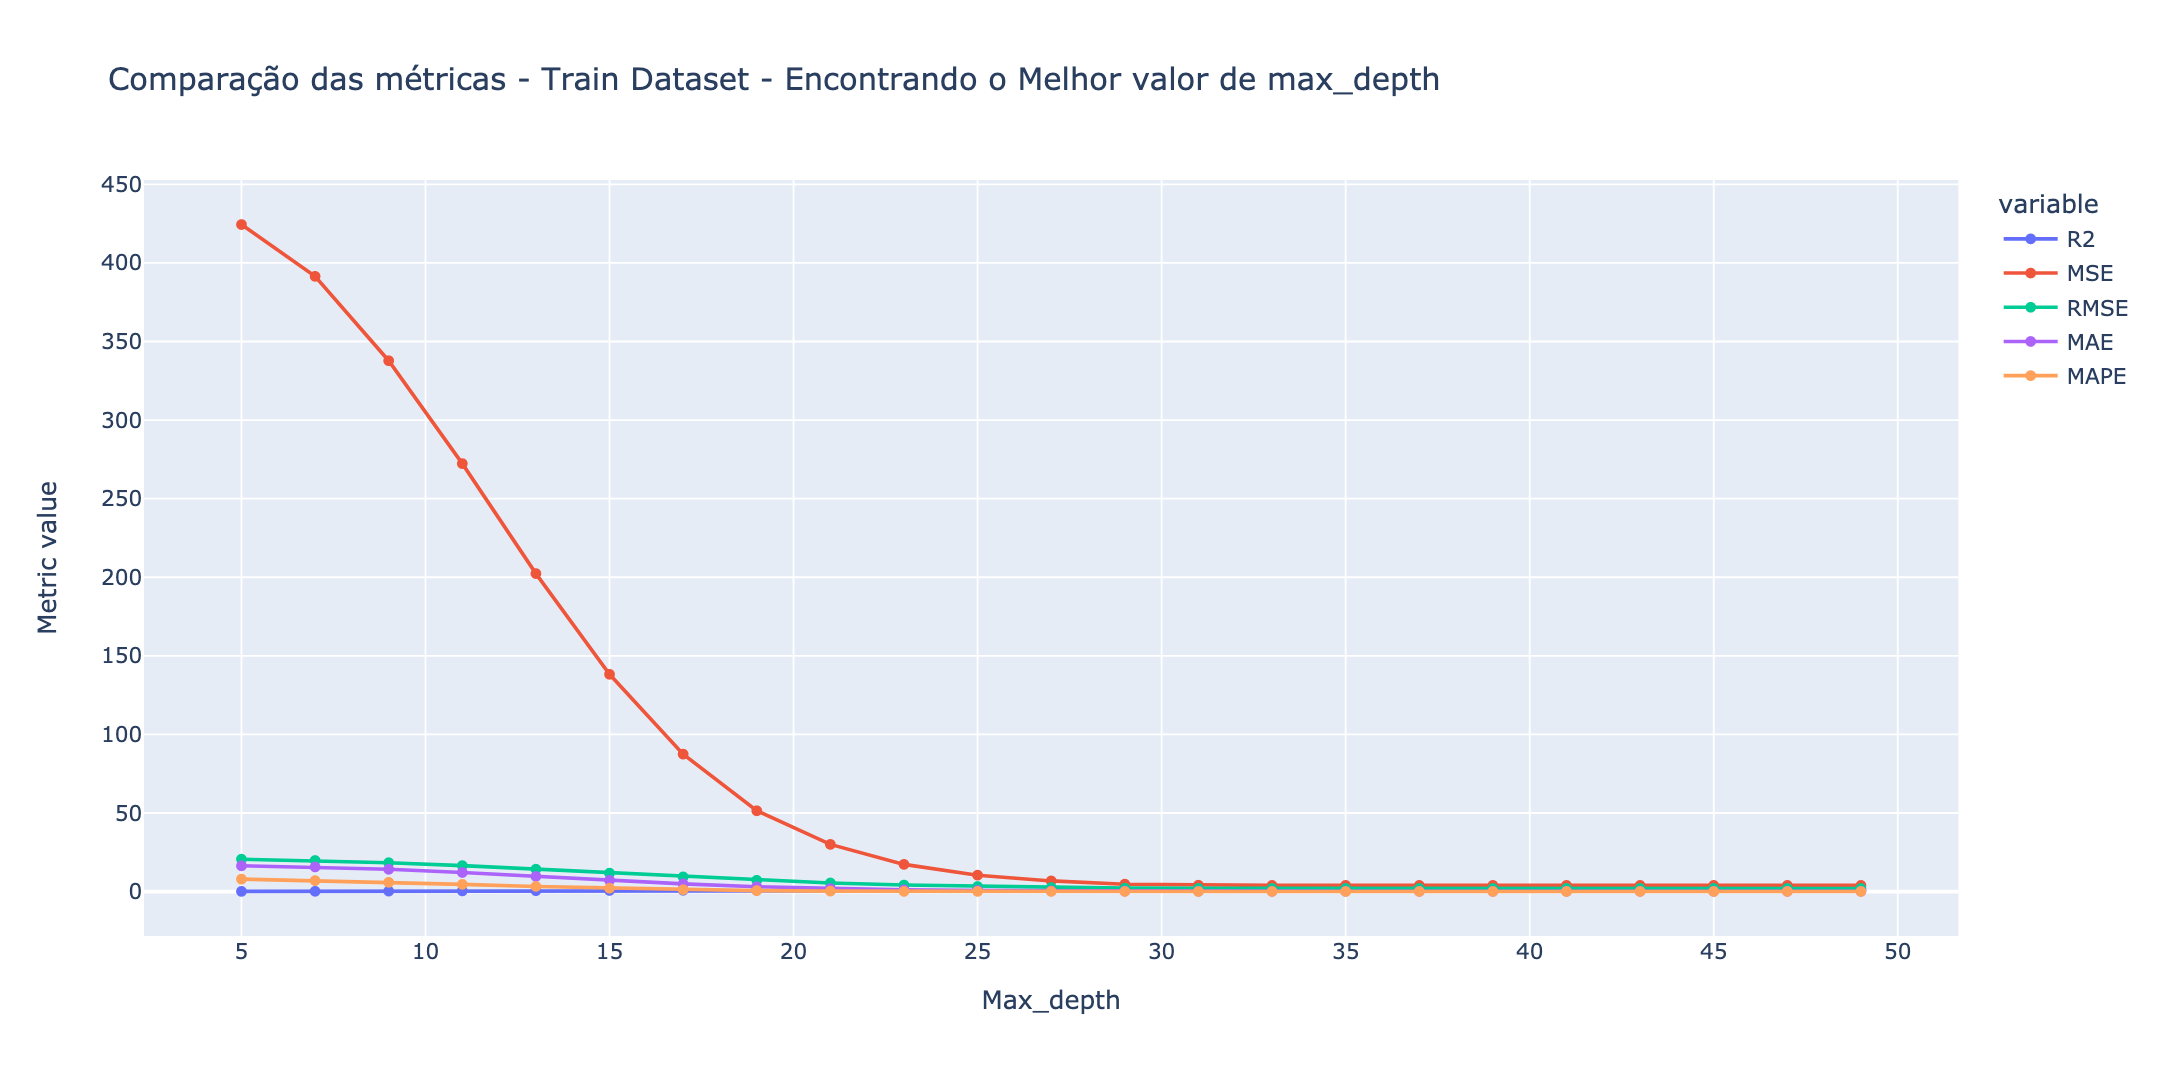

In [16]:
# Plotting train results
fig = px.line( results_train_dt_reg, x='max_depth', y=['R2', 'MSE', 'RMSE', 'MAE', 'MAPE'],
               title="Comparação das métricas - Train Dataset - Encontrando o Melhor valor de max_depth",
               labels={'value': 'Metric value','max_depth': 'Max_depth'},
               markers=True )  

fig.update_yaxes(type="linear")

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)

### 3.3.2 - Training Dataset 

In [17]:
# Model definition 
dt_reg = tr.DecisionTreeRegressor(max_depth= 35, random_state=0)
    
# Model Training 
dt_reg.fit(X_train, y_train)
    
# Performance 
ypred_train = dt_reg.predict(X_train)

# Metrics 
treereg_train_R2 = mt.r2_score(y_train, ypred_train)
treereg_train_MSE = mt.mean_squared_error(y_train, ypred_train)
treereg_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
treereg_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
treereg_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.3.3 - Validation Dataset

In [18]:
# Performance 
ypred_vali = dt_reg.predict(X_vali)

# Metrics 
treereg_vali_R2 = mt.r2_score(y_vali, ypred_vali)
treereg_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
treereg_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
treereg_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
treereg_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.3.4 - Test Dataset

In [19]:
# Performance 
ypred_test = dt_reg.predict(X_test)

# Metrics 
treereg_test_R2 = mt.r2_score(y_test, ypred_test)
treereg_test_MSE = mt.mean_squared_error(y_test, ypred_test)
treereg_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
treereg_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
treereg_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.3.5 - Appending Results 

In [20]:
treereg_train_results = [round(treereg_train_R2,3), round(treereg_train_MSE,3), 
                     round(treereg_train_RMSE,3), round(treereg_train_MAE,3), round(treereg_train_MAPE,3) ]

treereg_validation_results = [round(treereg_vali_R2,3), round(treereg_vali_MSE,3), 
                     round(treereg_vali_RMSE,3), round(treereg_vali_MAE,3), round(treereg_vali_MAPE,3) ]

treereg_test_results = [round(treereg_test_R2,3), round(treereg_test_MSE,3), 
                     round(treereg_test_RMSE,3), round(treereg_test_MAE,3), round(treereg_test_MAPE,3) ]

treereg_results_metrics = pd.DataFrame({'Train': treereg_train_results, 'Validation': treereg_validation_results, 'Test': treereg_test_results})
treereg_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Decision Tree Regression : ')
print(treereg_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Decision Tree Regression : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.992 |       -0.339 |  -0.29  |
| MSE  |   3.94  |      639.158 | 627.937 |
| RMSE |   1.985 |       25.282 |  25.059 |
| MAE  |   0.214 |       17.278 |  17.362 |
| MAPE |   0.083 |        7.123 |   6.477 |


## 3.4 - Random Forest Regression 

### 3.4.1 Finding the best n_estimators for Random Forest 

In [21]:
n_values = range(5,85,5)
results_train_forest_reg = pd.DataFrame()

for n in n_values:
    # Model definition 
    forest_reg = en.RandomForestRegressor(max_depth=35, n_estimators=n )
    
    # Model Training 
    forest_reg.fit(X_train, y_train)
    
    # Performance 
    ypred_train = forest_reg.predict(X_train)
    
    # Metrics 
    forest_train_R2 = mt.r2_score(y_train, ypred_train)
    forest_train_MSE = mt.mean_squared_error(y_train, ypred_train)
    forest_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
    forest_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
    forest_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)
    
    # Results
    results_train = pd.Series([n, forest_train_R2, forest_train_MSE, forest_train_RMSE, forest_train_MAE, forest_train_MAPE])
    
    # DataFraming arrays
    results_train_forest_reg = pd.concat([results_train_forest_reg, results_train], axis=1)

results_train_forest_reg.index = ['n_values', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']
results_train_forest_reg.columns = n_values
results_train_forest_reg = results_train_forest_reg.T
results_train_forest_reg.reset_index(drop=True, inplace=True)
results_train_forest_reg = results_train_forest_reg.round(3)

In [22]:
results_train_forest_reg

,n_values,R2,MSE,RMSE,MAE,MAPE
0,5.0,0.819,86.373,9.294,5.926,2.509
1,10.0,0.865,64.756,8.047,5.475,2.696
2,15.0,0.880,57.269,7.568,5.250,2.519
3,20.0,0.885,55.013,7.417,5.164,2.671
4,25.0,0.890,52.539,7.248,5.104,2.557
5,30.0,0.894,50.617,7.115,5.028,2.596
6,35.0,0.896,49.933,7.066,5.017,2.616
7,40.0,0.896,49.758,7.054,4.991,2.693
8,45.0,0.897,49.470,7.033,4.989,2.674
9,50.0,0.897,49.162,7.012,4.983,2.572


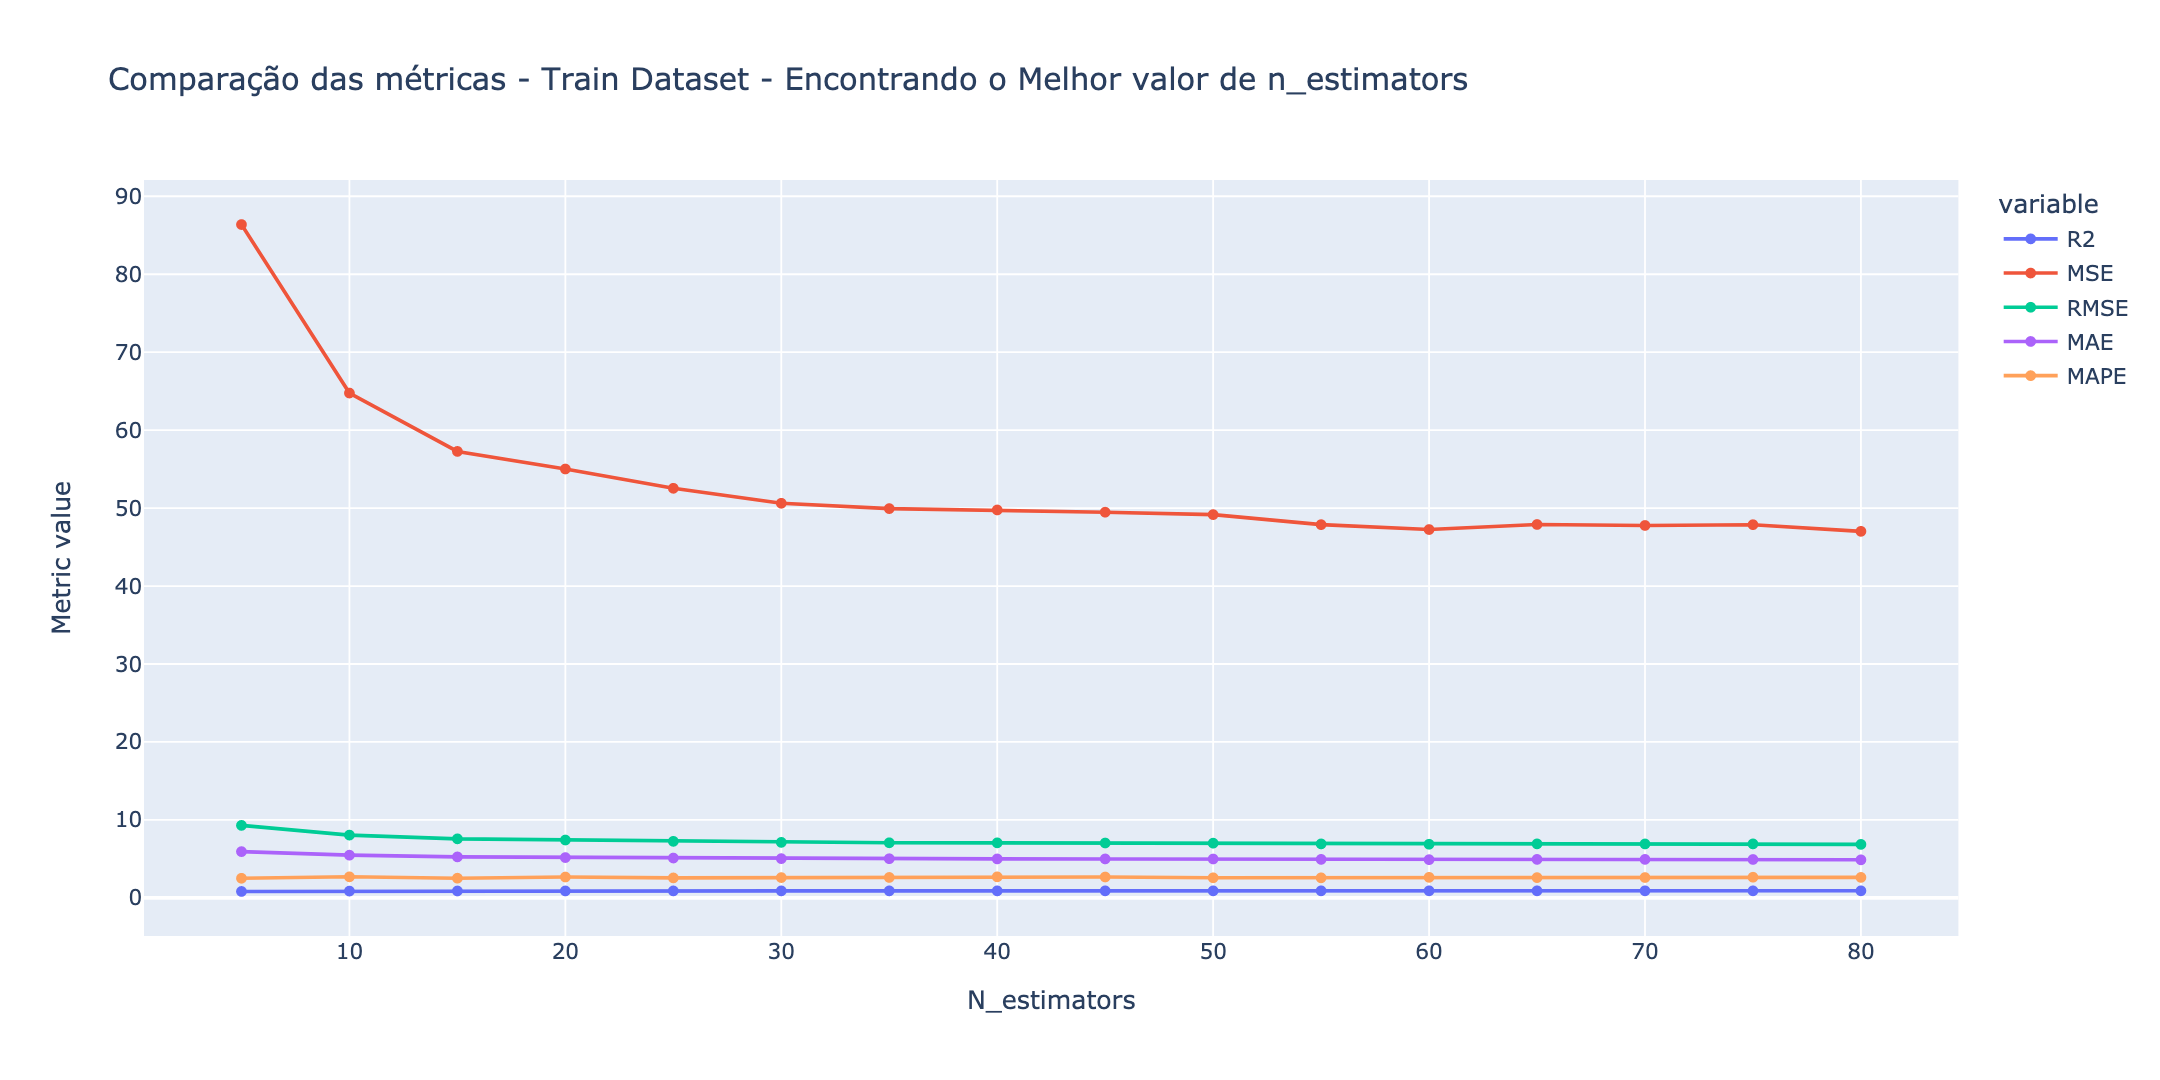

In [24]:
# Plotting train results
fig = px.line( results_train_forest_reg, x='n_values', y=['R2', 'MSE', 'RMSE', 'MAE', 'MAPE'],
               title="Comparação das métricas - Train Dataset - Encontrando o Melhor valor de n_estimators",
               labels={'value': 'Metric value','n_values': 'N_estimators'},
               markers=True )  

fig.update_yaxes(type="linear")

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)

### 3.4.2 - Training Dataset

In [25]:
# Model definition 
forest_reg = en.RandomForestRegressor(max_depth=35, n_estimators=70, random_state=0)
    
# Model Training 
forest_reg.fit(X_train, y_train)
    
# Performance 
ypred_train = forest_reg.predict(X_train)
    
# Metrics 
forest_train_R2 = mt.r2_score(y_train, ypred_train)
forest_train_MSE = mt.mean_squared_error(y_train, ypred_train)
forest_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
forest_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
forest_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.4.3 - Validation Dataset

In [26]:
# Performance 
ypred_vali = forest_reg.predict(X_vali)

# Metrics 
forest_vali_R2 = mt.r2_score(y_vali, ypred_vali)
forest_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
forest_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
forest_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
forest_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.4.4 - Test Dataset

In [27]:
# Performance 
ypred_test = forest_reg.predict(X_test)

# Metrics 
forest_test_R2 = mt.r2_score(y_test, ypred_test)
forest_test_MSE = mt.mean_squared_error(y_test, ypred_test)
forest_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
forest_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
forest_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.4.5 - Appending Results 

In [28]:
forest_train_results = [round(forest_train_R2,3), round(forest_train_MSE,3), 
                     round(forest_train_RMSE,3), round(forest_train_MAE,3), round(forest_train_MAPE,3) ]

forest_validation_results = [round(forest_vali_R2,3), round(forest_vali_MSE,3), 
                     round(forest_vali_RMSE,3), round(forest_vali_MAE,3), round(forest_vali_MAPE,3) ]

forest_test_results = [round(forest_test_R2,3), round(forest_test_MSE,3), 
                     round(forest_test_RMSE,3), round(forest_test_MAE,3), round(forest_test_MAPE,3) ]

forest_results_metrics = pd.DataFrame({'Train': forest_train_results, 'Validation': forest_validation_results, 'Test': forest_test_results})
forest_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Random Forest Regression : ')
print(forest_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Random Forest Regression : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.901 |        0.331 |   0.344 |
| MSE  |  47.417 |      319.346 | 319.335 |
| RMSE |   6.886 |       17.87  |  17.87  |
| MAE  |   4.931 |       13.021 |  13.133 |
| MAPE |   2.621 |        7.062 |   6.615 |


## 3.5 - Polinomial Regression 

### 3.5.1 - Finding de the best Degree 

In [29]:
degree_poli = range(1, 5)
results_train_poli_reg = pd.DataFrame()

for degree in degree_poli:
    # Call transformer
    polireg_prep = pp.PolynomialFeatures(degree=degree)
    
    # Transform
    polireg_train = polireg_prep.fit_transform(X_train)
    
    # Training 
    polireg = lm.LinearRegression()
    polireg.fit(polireg_train, y_train)
    
    # Performance 
    ypred_train = polireg.predict(polireg_train)
    
    # Métrics 
    poli_train_R2 = mt.r2_score(y_train, ypred_train)
    poli_train_MSE = mt.mean_squared_error(y_train, ypred_train)
    poli_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
    poli_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
    poli_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)
    
    # Results
    results_train = pd.Series([degree, poli_train_R2, poli_train_MSE, poli_train_RMSE, poli_train_MAE, poli_train_MAPE])
    
    # DataFraming arrays
    results_train_poli_reg = pd.concat([results_train_poli_reg, results_train], axis=1)


results_train_poli_reg.index = ['Degree', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']
results_train_poli_reg.columns = degree_poli
results_train_poli_reg = results_train_poli_reg.T
results_train_poli_reg.reset_index(drop=True, inplace=True)
results_train_poli_reg = results_train_poli_reg.round(3)

In [30]:
results_train_poli_reg

,Degree,R2,MSE,RMSE,MAE,MAPE
0,1.0,0.045,456.561,21.367,17.015,8.628
1,2.0,0.087,436.635,20.896,16.568,8.361
2,3.0,0.135,413.286,20.329,16.110,7.930
3,4.0,0.275,346.347,18.610,14.478,6.503


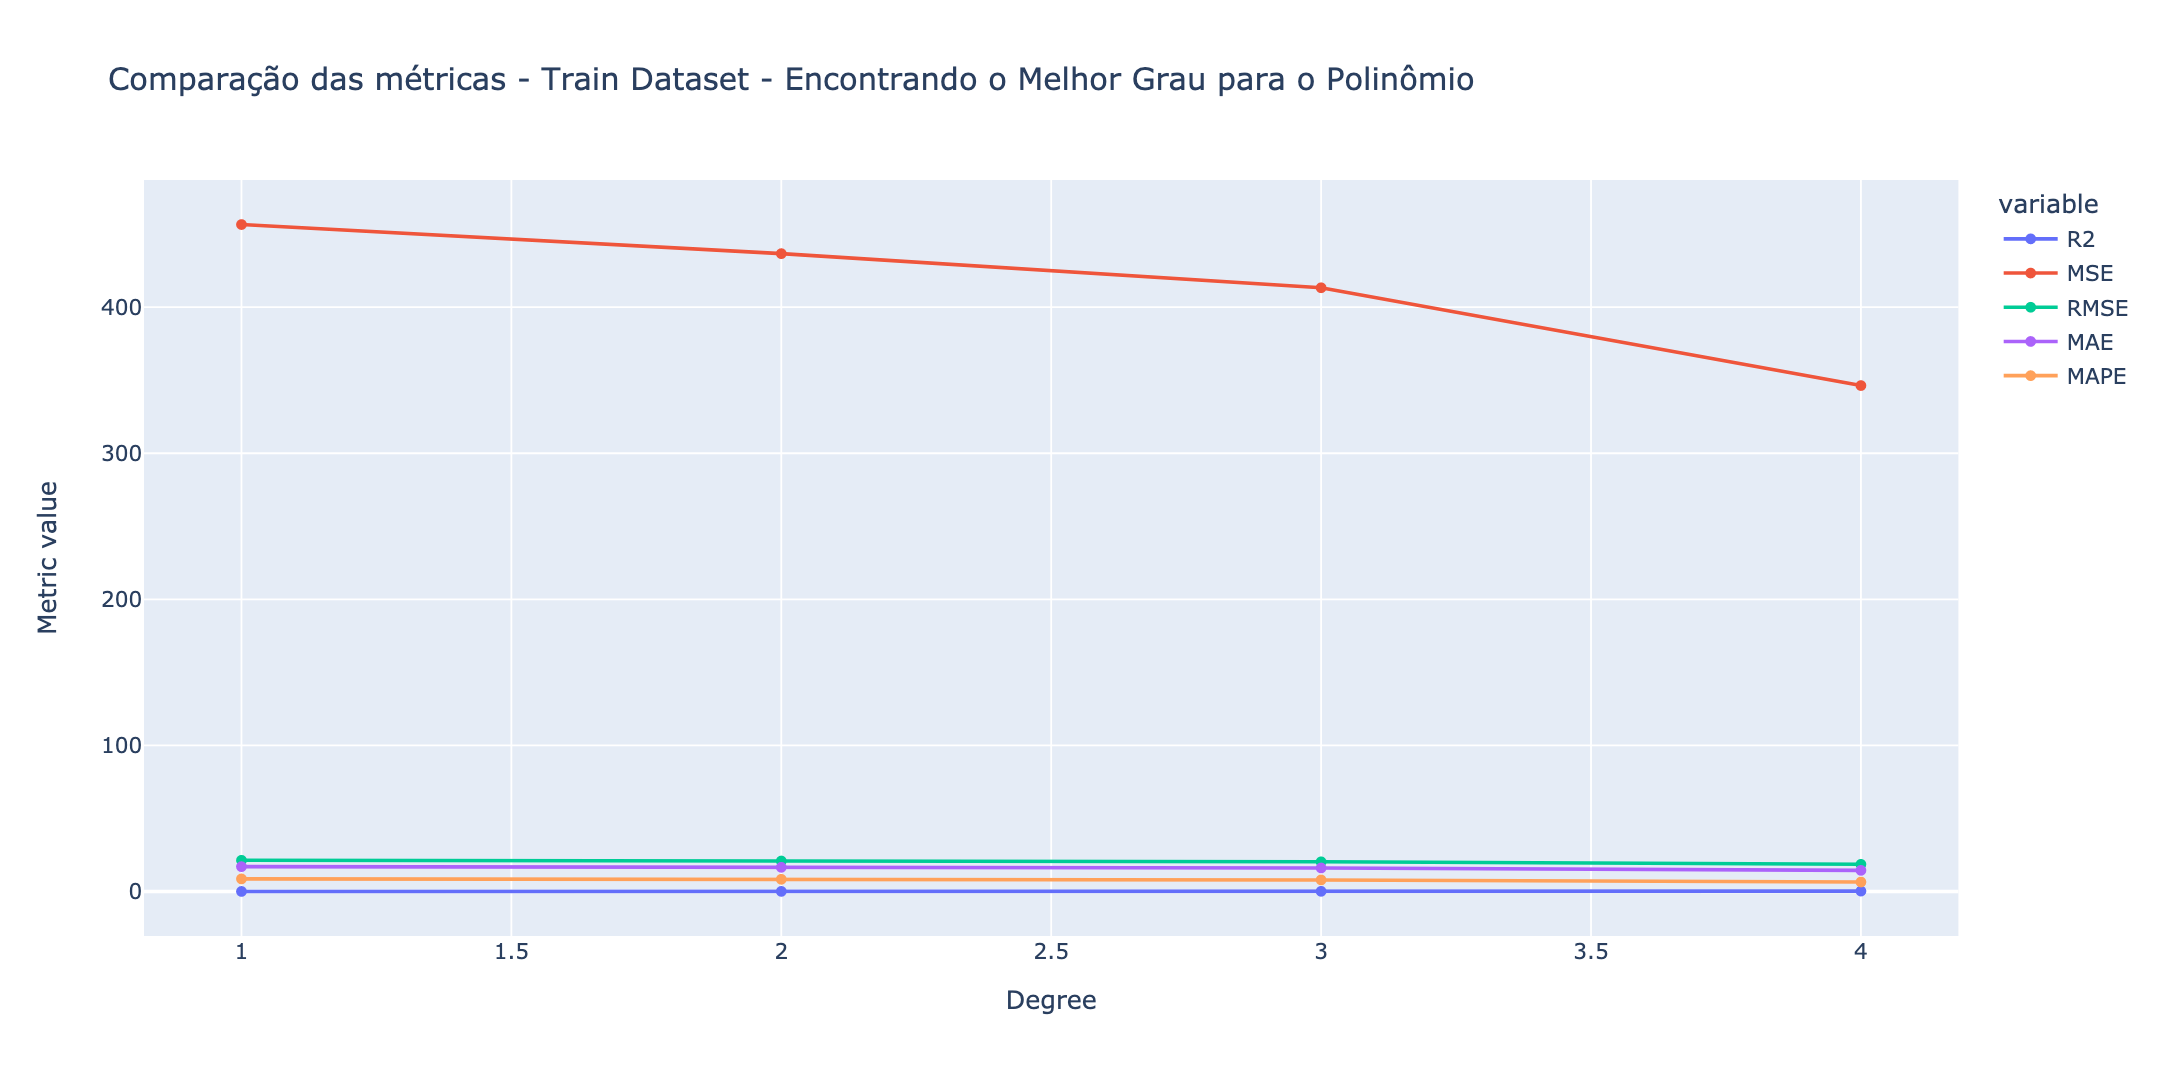

In [32]:
fig = px.line( results_train_poli_reg, x='Degree', y=['R2', 'MSE', 'RMSE', 'MAE', 'MAPE'],
               title="Comparação das métricas - Train Dataset - Encontrando o Melhor Grau para o Polinômio",
               labels={'value': 'Metric value','Degree': 'Degree'},
               markers=True )  

fig.update_yaxes(type="linear")

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)

### 3.5.2 - Training Dataset

In [33]:
# Call transformer
polireg_prep = pp.PolynomialFeatures(degree=2)
    
# Transform
polireg_train = polireg_prep.fit_transform(X_train)
polireg_vali = polireg_prep.fit_transform(X_vali)
polireg_test = polireg_prep.fit_transform(X_test)
    
# Training 
polireg = lm.LinearRegression()
polireg.fit(polireg_train, y_train)
    
# Performance 
ypred_train = polireg.predict(polireg_train)
    
# Métrics 
poli_train_R2 = mt.r2_score(y_train, ypred_train)
poli_train_MSE = mt.mean_squared_error(y_train, ypred_train)
poli_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
poli_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
poli_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.5.3 - Validation Dataset

In [34]:
# Performance 
ypred_vali = polireg.predict(polireg_vali)

# Metrics 
poli_vali_R2 = mt.r2_score(y_vali, ypred_vali)
poli_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
poli_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
poli_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
poli_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.5.4 - Test Dataset

In [35]:
# Performance 
ypred_test = polireg.predict(polireg_test)

# Metrics 
poli_test_R2 = mt.r2_score(y_test, ypred_test)
poli_test_MSE = mt.mean_squared_error(y_test, ypred_test)
poli_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
poli_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
poli_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.5.5 - Appending Results 

In [36]:
poli_train_results = [round(poli_train_R2,3), round(poli_train_MSE,3), 
                     round(poli_train_RMSE,3), round(poli_train_MAE,3), round(poli_train_MAPE,3) ]

poli_validation_results = [round(poli_vali_R2,3), round(poli_vali_MSE,3), 
                     round(poli_vali_RMSE,3), round(poli_vali_MAE,3), round(poli_vali_MAPE,3) ]

poli_test_results = [round(poli_test_R2,3), round(poli_test_MSE,3), 
                     round(poli_test_RMSE,3), round(poli_test_MAE,3), round(poli_test_MAPE,3) ]

poli_results_metrics = pd.DataFrame({'Train': poli_train_results, 'Validation': poli_validation_results, 'Test': poli_test_results})
poli_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Polynomial Regression : ')
print(poli_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Polynomial Regression : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.087 |        0.065 |   0.08  |
| MSE  | 436.635 |      446.644 | 448.027 |
| RMSE |  20.896 |       21.134 |  21.167 |
| MAE  |  16.568 |       16.791 |  16.847 |
| MAPE |   8.361 |        8.54  |   8.333 |


## 3.6 - Regularized Linear Regression (Lasso - L1)

### 3.6.1 - Training Dataset 

In [37]:
# Model Definition
linear_lasso =lm.Lasso(alpha=1,
                  max_iter=1000)

# Model Fit
linear_lasso.fit(X_train, y_train)

# Performance 
ypred_train = linear_lasso.predict(X_train)

# Metrics 
lasso_train_R2 = mt.r2_score(y_train, ypred_train)
lasso_train_MSE = mt.mean_squared_error(y_train, ypred_train)
lasso_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
lasso_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
lasso_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.6.2 - Validation Dataset

In [38]:
# Performance
ypred_vali = linear_lasso.predict(X_vali)

# Metrics 
lasso_vali_R2 = mt.r2_score(y_vali, ypred_vali)
lasso_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
lasso_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
lasso_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
lasso_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.6.3 - Test Dataset

In [39]:
# Performance 
ypred_test = linear_lasso.predict(X_test)

# Metrics 
lasso_test_R2 = mt.r2_score(y_test, ypred_test)
lasso_test_MSE = mt.mean_squared_error(y_test, ypred_test)
lasso_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
lasso_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
lasso_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.6.4 - Appending Results 

In [40]:
lasso_train_results = [round(lasso_train_R2,3), round(lasso_train_MSE,3), 
                     round(lasso_train_RMSE,3), round(lasso_train_MAE,3), round(lasso_train_MAPE,3) ]

lasso_validation_results = [round(lasso_vali_R2,3), round(lasso_vali_MSE,3), 
                     round(lasso_vali_RMSE,3), round(lasso_vali_MAE,3), round(lasso_vali_MAPE,3) ]

lasso_test_results = [round(lasso_test_R2,3), round(lasso_test_MSE,3), 
                     round(lasso_test_RMSE,3), round(lasso_test_MAE,3), round(lasso_test_MAPE,3) ]

lasso_results_metrics = pd.DataFrame({'Train': lasso_train_results, 'Validation': lasso_validation_results, 'Test': lasso_test_results})
lasso_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Regularized Linear Regression (Lasso - L1) : ')
print(lasso_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Regularized Linear Regression (Lasso - L1) : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.007 |        0.008 |   0.008 |
| MSE  | 474.475 |      473.747 | 483.178 |
| RMSE |  21.782 |       21.766 |  21.981 |
| MAE  |  17.305 |       17.265 |  17.473 |
| MAPE |   8.737 |        8.696 |   8.753 |


## 3.7 - Regularized Linear Regression (Rigde-L2)

### 3.7.1 - Training Dataset

In [41]:
# Model Definition
linear_rigde =lm.Ridge(alpha=0.5,
                  max_iter=1000)

# Model Fit
linear_rigde.fit(X_train, y_train)

# Performance 
ypred_train = linear_rigde.predict(X_train)

# Metrics 
rigde_train_R2 = mt.r2_score(y_train, ypred_train)
rigde_train_MSE = mt.mean_squared_error(y_train, ypred_train)
rigde_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
rigde_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
rigde_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.7.2 - Validation Dataset

In [42]:
# Performance
ypred_vali = linear_rigde.predict(X_vali)

# Metrics 
rigde_vali_R2 = mt.r2_score(y_vali, ypred_vali)
rigde_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
rigde_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
rigde_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
rigde_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.7.3 - Test Dataset

In [43]:
# Performance 
ypred_test = linear_rigde.predict(X_test)

# Metrics 
rigde_test_R2 = mt.r2_score(y_test, ypred_test)
rigde_test_MSE = mt.mean_squared_error(y_test, ypred_test)
rigde_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
rigde_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
rigde_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.7.4 Appending Results 

In [45]:
rigde_train_results = [round(rigde_train_R2,3), round(rigde_train_MSE,3), 
                     round(rigde_train_RMSE,3), round(rigde_train_MAE,3), round(rigde_train_MAPE,3) ]

rigde_validation_results = [round(rigde_vali_R2,3), round(rigde_vali_MSE,3), 
                     round(rigde_vali_RMSE,3), round(rigde_vali_MAE,3), round(rigde_vali_MAPE,3) ]

rigde_test_results = [round(rigde_test_R2,3), round(rigde_test_MSE,3), 
                     round(rigde_test_RMSE,3), round(rigde_test_MAE,3), round(rigde_test_MAPE,3) ]

rigde_results_metrics = pd.DataFrame({'Train': rigde_train_results, 'Validation': rigde_validation_results, 'Test': rigde_test_results})
rigde_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Regularized Linear Regression (Ridge - L2) : ')
print(rigde_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Regularized Linear Regression (Ridge - L2) : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.045 |        0.04  |   0.048 |
| MSE  | 456.561 |      458.196 | 463.689 |
| RMSE |  21.367 |       21.406 |  21.533 |
| MAE  |  17.015 |       17.041 |  17.178 |
| MAPE |   8.628 |        8.663 |   8.529 |


## 3.8 Regularized Linear Regresison (Elastic Net - L1 & L2)

### 3.8.1 - Validation Dataset

In [46]:
# Model Definition
elastic_linear =lm.ElasticNet(alpha=0.5,
                              max_iter=1000,
                              l1_ratio=0.5 )

# Model Fit
elastic_linear.fit(X_train, y_train)

# Performance 
ypred_train = elastic_linear.predict(X_train)

# Metrics 
elastic_train_R2 = mt.r2_score(y_train, ypred_train)
elastic_train_MSE = mt.mean_squared_error(y_train, ypred_train)
elastic_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
elastic_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
elastic_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.8.2 - Validation Dataset

In [47]:
# Performance
ypred_vali = elastic_linear.predict(X_vali)

# Metrics 
elastic_vali_R2 = mt.r2_score(y_vali, ypred_vali)
elastic_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
elastic_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
elastic_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
elastic_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.8.3 - Test Dataset

In [48]:
# Performance 
ypred_test = elastic_linear.predict(X_test)

# Metrics 
elastic_test_R2 = mt.r2_score(y_test, ypred_test)
elastic_test_MSE = mt.mean_squared_error(y_test, ypred_test)
elastic_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
elastic_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
elastic_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.8.4 - Appending Results 

In [49]:
elastic_train_results = [round(elastic_train_R2,3), round(elastic_train_MSE,3), 
                     round(elastic_train_RMSE,3), round(elastic_train_MAE,3), round(elastic_train_MAPE,3) ]

elastic_validation_results = [round(elastic_vali_R2,3), round(elastic_vali_MSE,3), 
                     round(elastic_vali_RMSE,3), round(elastic_vali_MAE,3), round(elastic_vali_MAPE,3) ]

elastic_test_results = [round(elastic_test_R2,3), round(elastic_test_MSE,3), 
                     round(elastic_test_RMSE,3), round(elastic_test_MAE,3), round(elastic_test_MAPE,3) ]

elastic_results_metrics = pd.DataFrame({'Train': elastic_train_results, 'Validation': elastic_validation_results, 'Test': elastic_test_results})
elastic_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Regularized Linear Regression (Elastic Net - L1 & L2) : ')
print(elastic_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Regularized Linear Regression (Elastic Net - L1 & L2) : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.012 |        0.013 |   0.013 |
| MSE  | 472.045 |      471.528 | 480.687 |
| RMSE |  21.727 |       21.715 |  21.925 |
| MAE  |  17.266 |       17.222 |  17.426 |
| MAPE |   8.716 |        8.692 |   8.736 |


## 3.9 - Regularized Polinomial Regression (Lasso - L1)

### 3.9.1 - Training Dataset

In [50]:
# Parameters
degree_lasso = 3
alpha_value = 1
max_iterations = 1000

# Call transformer
polireg_prep_lasso = pp.PolynomialFeatures(degree=degree_lasso)
    
# Transform
polireg_train_lasso = polireg_prep_lasso.fit_transform(X_train)
polireg_vali_lasso = polireg_prep_lasso.fit_transform(X_vali)
polireg_test_lasso = polireg_prep_lasso.fit_transform(X_test)
    
# Training 
polireg_lasso = lm.Lasso(alpha=alpha_value, 
                         max_iter=max_iterations   )
polireg_lasso.fit(polireg_train_lasso, y_train)
    
# Performance 
ypred_train = polireg_lasso.predict(polireg_train_lasso)
    
# Métrics 
poli_lasso_train_R2 = mt.r2_score(y_train, ypred_train)
poli_lasso_train_MSE = mt.mean_squared_error(y_train, ypred_train)
poli_lasso_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
poli_lasso_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
poli_lasso_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.9.2 - Validation Dataset

In [51]:
# Performance 
ypred_vali = polireg_lasso.predict(polireg_vali_lasso)

# Metrics 
poli_lasso_vali_R2 = mt.r2_score(y_vali, ypred_vali)
poli_lasso_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
poli_lasso_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
poli_lasso_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
poli_lasso_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.9.3 - Test Dataset

In [52]:
# Performance 
ypred_test = polireg_lasso.predict(polireg_test_lasso)

# Metrics 
poli_lasso_test_R2 = mt.r2_score(y_test, ypred_test)
poli_lasso_test_MSE = mt.mean_squared_error(y_test, ypred_test)
poli_lasso_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
poli_lasso_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
poli_lasso_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### Appending Results 

In [53]:
polilasso_train_results = [round(poli_lasso_train_R2,3), round(poli_lasso_train_MSE,3), 
                     round(poli_lasso_train_RMSE,3), round(poli_lasso_train_MAE,3), round(poli_lasso_train_MAPE,3) ]

polilasso_validation_results = [round(poli_lasso_vali_R2,3), round(poli_lasso_vali_MSE,3), 
                     round(poli_lasso_vali_RMSE,3), round(poli_lasso_vali_MAE,3), round(poli_lasso_vali_MAPE,3) ]

polilasso_test_results = [round(poli_lasso_test_R2,3), round(poli_lasso_test_MSE,3), 
                     round(poli_lasso_test_RMSE,3), round(poli_lasso_test_MAE,3), round(poli_lasso_test_MAPE,3) ]

polilasso_results_metrics = pd.DataFrame({'Train': polilasso_train_results, 'Validation': polilasso_validation_results, 'Test': polilasso_test_results})
polilasso_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Regularized Polinomial Regression (Lasso - L1) : ')
print(polilasso_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Regularized Polinomial Regression (Lasso - L1) : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.014 |        0.014 |  -0.004 |
| MSE  | 471.28  |      470.756 | 488.715 |
| RMSE |  21.709 |       21.697 |  22.107 |
| MAE  |  17.23  |       17.181 |  17.445 |
| MAPE |   8.649 |        8.656 |   8.756 |


## 3.10 - Regularized Polinomial Regression (Ridge - L2)

### 3.10.1 - Training Dataset

In [54]:
# Parameters
degree_ridge = 2
alpha_value = 1
max_iterations = 1000

# Call transformer
polireg_prep_ridge = pp.PolynomialFeatures(degree=degree_ridge)
    
# Transform
polireg_train_ridge = polireg_prep_ridge.fit_transform(X_train)
polireg_vali_ridge = polireg_prep_ridge.fit_transform(X_vali)
polireg_test_ridge = polireg_prep_ridge.fit_transform(X_test)
    
# Training 
polireg_ridge = lm.Ridge( alpha=alpha_value, 
                          max_iter=max_iterations )
polireg_ridge.fit(polireg_train_ridge, y_train)
    
# Performance 
ypred_train = polireg_ridge.predict(polireg_train_ridge)
    
# Métrics 
poli_ridge_train_R2 = mt.r2_score(y_train, ypred_train)
poli_ridge_train_MSE = mt.mean_squared_error(y_train, ypred_train)
poli_ridge_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
poli_ridge_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
poli_ridge_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.10.2 - Validation Dataset 

In [55]:
# Performance 
ypred_vali = polireg_ridge.predict(polireg_vali_ridge)

# Metrics 
poli_ridge_vali_R2 = mt.r2_score(y_vali, ypred_vali)
poli_ridge_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
poli_ridge_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
poli_ridge_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
poli_ridge_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.10.3 - Test Dataset

In [56]:
# Performance 
ypred_test = polireg_ridge.predict(polireg_test_ridge)

# Metrics 
poli_ridge_test_R2 = mt.r2_score(y_test, ypred_test)
poli_ridge_test_MSE = mt.mean_squared_error(y_test, ypred_test)
poli_ridge_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
poli_ridge_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
poli_ridge_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.10.4 - Appending Results 

In [57]:
poliridge_train_results = [round(poli_ridge_train_R2,3), round(poli_ridge_train_MSE,3), 
                     round(poli_ridge_train_RMSE,3), round(poli_ridge_train_MAE,3), round(poli_ridge_train_MAPE,3) ]

poliridge_validation_results = [round(poli_ridge_vali_R2,3), round(poli_ridge_vali_MSE,3), 
                     round(poli_ridge_vali_RMSE,3), round(poli_ridge_vali_MAE,3), round(poli_ridge_vali_MAPE,3) ]

poliridge_test_results = [round(poli_ridge_test_R2,3), round(poli_ridge_test_MSE,3), 
                     round(poli_ridge_test_RMSE,3), round(poli_ridge_test_MAE,3), round(poli_ridge_test_MAPE,3) ]

poliridge_results_metrics = pd.DataFrame({'Train': poliridge_train_results, 'Validation': poliridge_validation_results, 'Test': poliridge_test_results})
poliridge_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Regularized Polinomial Regression (Ridge - L2) : ')
print(poliridge_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Regularized Polinomial Regression (Ridge - L2) : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.086 |        0.067 |   0.079 |
| MSE  | 437.12  |      445.744 | 448.471 |
| RMSE |  20.907 |       21.113 |  21.177 |
| MAE  |  16.58  |       16.78  |  16.852 |
| MAPE |   8.379 |        8.555 |   8.339 |


## 3.11 - Regularized Polinomial Regression (Elastic Net - L1 & L2)


### 3.11.1 - Training Dataset

In [58]:
# Parameters
degree_elasticnet = 2
alpha_value = 0.5
max_iterations = 1000

# Call transformer
polireg_prep_elasticnet = pp.PolynomialFeatures(degree=degree_elasticnet)
    
# Transform
polireg_train_elasticnet = polireg_prep_elasticnet.fit_transform(X_train)
polireg_vali_elasticnet = polireg_prep_elasticnet.fit_transform(X_vali)
polireg_test_elasticnet = polireg_prep_elasticnet.fit_transform(X_test)
    
# Training 
polireg_elasticnet = lm.ElasticNet( alpha=alpha_value, 
                          max_iter=max_iterations )
polireg_elasticnet.fit(polireg_train_elasticnet, y_train)
    
# Performance 
ypred_train = polireg_elasticnet.predict(polireg_train_elasticnet)
    
# Métrics 
poli_elasticnet_train_R2 = mt.r2_score(y_train, ypred_train)
poli_elasticnet_train_MSE = mt.mean_squared_error(y_train, ypred_train)
poli_elasticnet_train_RMSE = np.sqrt(mt.mean_squared_error(y_train, ypred_train))
poli_elasticnet_train_MAE = mt.mean_absolute_error(y_train, ypred_train)
poli_elasticnet_train_MAPE = mt.mean_absolute_percentage_error(y_train, ypred_train)

### 3.11.2 - Validation Dataset

In [59]:
# Performance 
ypred_vali = polireg_elasticnet.predict(polireg_vali_elasticnet)

# Metrics 
poli_elasticnet_vali_R2 = mt.r2_score(y_vali, ypred_vali)
poli_elasticnet_vali_MSE = mt.mean_squared_error(y_vali, ypred_vali)
poli_elasticnet_vali_RMSE = np.sqrt(mt.mean_squared_error(y_vali, ypred_vali))
poli_elasticnet_vali_MAE = mt.mean_absolute_error(y_vali, ypred_vali)
poli_elasticnet_vali_MAPE = mt.mean_absolute_percentage_error(y_vali, ypred_vali)

### 3.11.3 - Test Dataset 

In [60]:
# Performance 
ypred_test = polireg_elasticnet.predict(polireg_test_elasticnet)

# Metrics 
poli_elasticnet_test_R2 = mt.r2_score(y_test, ypred_test)
poli_elasticnet_test_MSE = mt.mean_squared_error(y_test, ypred_test)
poli_elasticnet_test_RMSE = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
poli_elasticnet_test_MAE = mt.mean_absolute_error(y_test, ypred_test)
poli_elasticnet_test_MAPE = mt.mean_absolute_percentage_error(y_test, ypred_test)

### 3.11.4 - Appending Results

In [61]:
polielasticnet_train_results = [round(poli_elasticnet_train_R2,3), round(poli_elasticnet_train_MSE,3), 
                     round(poli_elasticnet_train_RMSE,3), round(poli_elasticnet_train_MAE,3), round(poli_elasticnet_train_MAPE,3) ]

polielasticnet_validation_results = [round(poli_elasticnet_vali_R2,3), round(poli_elasticnet_vali_MSE,3), 
                     round(poli_elasticnet_vali_RMSE,3), round(poli_elasticnet_vali_MAE,3), round(poli_elasticnet_vali_MAPE,3) ]

polielasticnet_test_results = [round(poli_elasticnet_test_R2,3), round(poli_elasticnet_test_MSE,3), 
                     round(poli_elasticnet_test_RMSE,3), round(poli_elasticnet_test_MAE,3), round(poli_elasticnet_test_MAPE,3) ]

polielasticnet_results_metrics = pd.DataFrame({'Train': polielasticnet_train_results, 'Validation': polielasticnet_validation_results, 'Test': polielasticnet_test_results})
polielasticnet_results_metrics.index = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']


print(f'Resultados das métricas de performance por DataSet no algoritmo Regularized Polinomial Regression (Elastic Net - L1 & L2) : ')
print(polielasticnet_results_metrics.to_markdown())

Resultados das métricas de performance por DataSet no algoritmo Regularized Polinomial Regression (Elastic Net - L1 & L2) : 
|      |   Train |   Validation |    Test |
|:-----|--------:|-------------:|--------:|
| R2   |   0.024 |        0.022 |   0.021 |
| MSE  | 466.323 |      466.777 | 476.917 |
| RMSE |  21.595 |       21.605 |  21.838 |
| MAE  |  17.136 |       17.107 |  17.319 |
| MAPE |   8.641 |        8.665 |   8.716 |


## 3.12 - Concatenating Regression Results

### 3.12.1 - Training Results 

In [62]:
metrics = ['R2', 'MSE', 'RMSE', 'MAE', 'MAPE']

In [63]:
train_regression_results = pd.DataFrame({'Linear Model': linear_train_results, 
                                         'Linear Model Lasso': lasso_train_results, 
                                         'Linear Model Ridge': rigde_train_results,
                                         'Linear Model ElasticNet': elastic_train_results,
                                         'Decision Tree Regressor': treereg_train_results,
                                         'Random Forest Regressor': forest_train_results,
                                         'Polinomial Regression': poli_train_results,
                                         'Polinomial Regression Lasso': polilasso_train_results,
                                         'Polinomial Regression Ridge': poliridge_train_results,
                                         'Polinomial Regression ElasticNet': polielasticnet_train_results}, index=metrics).T
print('Training Dataset Metrics')
print(train_regression_results.to_markdown())

Training Dataset Metrics
|                                  |    R2 |     MSE |   RMSE |    MAE |   MAPE |
|:---------------------------------|------:|--------:|-------:|-------:|-------:|
| Linear Model                     | 0.045 | 456.561 | 21.367 | 17.015 |  8.628 |
| Linear Model Lasso               | 0.007 | 474.475 | 21.782 | 17.305 |  8.737 |
| Linear Model Ridge               | 0.045 | 456.561 | 21.367 | 17.015 |  8.628 |
| Linear Model ElasticNet          | 0.012 | 472.045 | 21.727 | 17.266 |  8.716 |
| Decision Tree Regressor          | 0.992 |   3.94  |  1.985 |  0.214 |  0.083 |
| Random Forest Regressor          | 0.901 |  47.417 |  6.886 |  4.931 |  2.621 |
| Polinomial Regression            | 0.087 | 436.635 | 20.896 | 16.568 |  8.361 |
| Polinomial Regression Lasso      | 0.014 | 471.28  | 21.709 | 17.23  |  8.649 |
| Polinomial Regression Ridge      | 0.086 | 437.12  | 20.907 | 16.58  |  8.379 |
| Polinomial Regression ElasticNet | 0.024 | 466.323 | 21.595 | 17.136 | 

In [64]:
validation_regression_results = pd.DataFrame({'Linear Model': linear_validation_results, 
                                         'Linear Model Lasso': lasso_validation_results, 
                                         'Linear Model Ridge': rigde_validation_results,
                                         'Linear Model ElasticNet': elastic_validation_results,
                                         'Decision Tree Regressor': treereg_validation_results,
                                         'Random Forest Regressor': forest_validation_results,
                                         'Polinomial Regression': poli_validation_results,
                                         'Polinomial Regression Lasso': polilasso_validation_results,
                                         'Polinomial Regression Ridge': poliridge_validation_results,
                                         'Polinomial Regression ElasticNet': polielasticnet_validation_results}, index=metrics).T

print(validation_regression_results.to_markdown())

|                                  |     R2 |     MSE |   RMSE |    MAE |   MAPE |
|:---------------------------------|-------:|--------:|-------:|-------:|-------:|
| Linear Model                     |  0.04  | 458.197 | 21.406 | 17.041 |  8.663 |
| Linear Model Lasso               |  0.008 | 473.747 | 21.766 | 17.265 |  8.696 |
| Linear Model Ridge               |  0.04  | 458.196 | 21.406 | 17.041 |  8.663 |
| Linear Model ElasticNet          |  0.013 | 471.528 | 21.715 | 17.222 |  8.692 |
| Decision Tree Regressor          | -0.339 | 639.158 | 25.282 | 17.278 |  7.123 |
| Random Forest Regressor          |  0.331 | 319.346 | 17.87  | 13.021 |  7.062 |
| Polinomial Regression            |  0.065 | 446.644 | 21.134 | 16.791 |  8.54  |
| Polinomial Regression Lasso      |  0.014 | 470.756 | 21.697 | 17.181 |  8.656 |
| Polinomial Regression Ridge      |  0.067 | 445.744 | 21.113 | 16.78  |  8.555 |
| Polinomial Regression ElasticNet |  0.022 | 466.777 | 21.605 | 17.107 |  8.665 |


In [65]:
validation_regression_results = pd.DataFrame({'Linear Model': linear_test_results, 
                                         'Linear Model Lasso': lasso_test_results, 
                                         'Linear Model Ridge': rigde_test_results,
                                         'Linear Model ElasticNet': elastic_test_results,
                                         'Decision Tree Regressor': treereg_test_results,
                                         'Random Forest Regressor': forest_test_results,
                                         'Polinomial Regression': poli_test_results,
                                         'Polinomial Regression Lasso': polilasso_test_results,
                                         'Polinomial Regression Ridge': poliridge_test_results,
                                         'Polinomial Regression ElasticNet': polielasticnet_test_results}, index=metrics).T

print(validation_regression_results.to_markdown())

|                                  |     R2 |     MSE |   RMSE |    MAE |   MAPE |
|:---------------------------------|-------:|--------:|-------:|-------:|-------:|
| Linear Model                     |  0.048 | 463.691 | 21.533 | 17.178 |  8.528 |
| Linear Model Lasso               |  0.008 | 483.178 | 21.981 | 17.473 |  8.753 |
| Linear Model Ridge               |  0.048 | 463.689 | 21.533 | 17.178 |  8.529 |
| Linear Model ElasticNet          |  0.013 | 480.687 | 21.925 | 17.426 |  8.736 |
| Decision Tree Regressor          | -0.29  | 627.937 | 25.059 | 17.362 |  6.477 |
| Random Forest Regressor          |  0.344 | 319.335 | 17.87  | 13.133 |  6.615 |
| Polinomial Regression            |  0.08  | 448.027 | 21.167 | 16.847 |  8.333 |
| Polinomial Regression Lasso      | -0.004 | 488.715 | 22.107 | 17.445 |  8.756 |
| Polinomial Regression Ridge      |  0.079 | 448.471 | 21.177 | 16.852 |  8.339 |
| Polinomial Regression ElasticNet |  0.021 | 476.917 | 21.838 | 17.319 |  8.716 |
